In [292]:
import matplotlib.pyplot as plt
import matplotlib
import wandb
from rliable import library as rly
from rliable import metrics
from matplotlib.patches import Patch
from rliable import plot_utils
import seaborn as sns
import numpy as np
import os
from collections import OrderedDict

from utils import *

In [293]:
# plt.rcParams["legend.title_fontsize"] = "large"
plt.rcParams.update({'font.size': 20})

matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

In [294]:
# Initialize the wandb API
api = wandb.Api()

# Define your project and entity (replace with your specific values)
entity = "cl-probing"  # e.g., your username or team name
figures_path = "./figures"
data_path = "./data"
os.makedirs(figures_path, exist_ok=True)
os.makedirs(data_path, exist_ok=True)
take_x_seeds = 10
window_size = 10
use_se = True
all_configs = []

## Generalized Stitching Configs

In [295]:
def discount_grouping_func(config):
    result = str(config['agent']['discount'])

    return result

def entropy_grouping_func(config):
    result = str(-config['agent']['target_entropy'])

    return result


discounts = [0.9, 0.99, 0.999]

entropies = [1.79, 1.1, 0.69]

config_1 = {
    "directory": "hparams",
    "save":"crl_discount",
    "title": f"CRL discount tuning",
    "projects":["CRL_hparams"],
    "possible_names":[str(d) for d in discounts],
    "filters":{
        "state":"finished",
        "config.exp.name":{"$regex": ".*discount.*"}
    },
    "grouping_func": discount_grouping_func,
    "metrics": OrderedDict([
        ("eval/mean_success", "Training success on 3 boxes"),
        ("eval_special/mean_success", "Test success on 3 boxes"),
    ]),
    "ylabel": 'Discount',
}

config_2 = {
    "directory": "hparams",
    "save":"crl_entropy",
    "title": f"CRL entropy tuning",
    "projects":["CRL_hparams"],
    "possible_names":[str(e) for e in entropies],
    "filters":{
        "state":"finished",
        "config.exp.name":{"$regex": "^(?!.*all_metrics).*entropy"}
    },
    "grouping_func": entropy_grouping_func,
    "metrics": OrderedDict([
        ("eval/mean_success", "Training success on 3 boxes"),
        ("eval_special/mean_success", "Test success on 3 boxes"),
    ]),
    "ylabel": 'Target entropy',
}

config_3 = {
    "directory": "hparams",
    "save":"crl_entropy_argmax",
    "title": f"CRL argmax entropy tuning",
    "projects":["CRL_hparams"],
    "possible_names":[str(e) for e in entropies],
    "filters":{
        "state":"finished",
        "config.exp.name":{"$regex": ".*all_metrics.*"}
    },
    "grouping_func": entropy_grouping_func,
    "metrics": OrderedDict([
        ("evalargmax_q/mean_success", "Training success on 3 boxes"), 
        ("eval_specialargmax_q/mean_success", "Test success on 3 boxes"), 
    ]),
    "ylabel": 'Target entropy',
}


config_4 = {
    "directory": "hparams",
    "save":"dqn_discount",
    "title": f"DQN discount tuning",
    "projects":["DQN_hparams"],
    "possible_names":[str(d) for d in discounts],
    "filters":{
        "state":"finished",
        "config.agent.agent_name":"gcdqn",
        "config.exp.name":{"$regex": ".*discount.*"},
        "config.agent.use_discounted_mc_rewards":False
    },
    "grouping_func": discount_grouping_func,
    "metrics": OrderedDict([
        ("eval/mean_success", "Training success on 3 boxes"),
        ("eval_special/mean_success", "Test success on 3 boxes"),
    ]),
    "ylabel": 'Discount',
}

config_5 = {
    "directory": "hparams",
    "save":"dqn_entropy",
    "title": f"DQN entropy tuning",
    "projects":["DQN_hparams"],
    "possible_names":[str(e) for e in entropies],
    "filters":{
        "state":"finished",
        "config.agent.agent_name":"gcdqn",
        "config.exp.name":{"$regex": "^(?!.*all_metrics).*entropy"},
        "config.agent.use_discounted_mc_rewards":False
    },
    "grouping_func": entropy_grouping_func,
    "metrics": OrderedDict([
        ("eval/mean_success", "Training success on 3 boxes"),
        ("eval_special/mean_success", "Test success on 3 boxes"),
    ]),
    "ylabel": 'Target entropy',
}

config_6 = {
    "directory": "hparams",
    "save":"dqn_entropy_argmax",
    "title": f"DQN argmax entropy tuning",
    "projects":["DQN_hparams"],
    "possible_names":[str(e) for e in entropies],
    "filters":{
        "state":"finished",
        "config.agent.agent_name":"gcdqn",
        "config.exp.name":{"$regex": ".*all_metrics.*"},
        "config.agent.use_discounted_mc_rewards":False
    },
    "grouping_func": entropy_grouping_func,
    "metrics": OrderedDict([
        ("evalargmax_q/mean_success", "Training success on 3 boxes"), 
        ("eval_specialargmax_q/mean_success", "Test success on 3 boxes"), 
    ]),
    "ylabel": 'Target entropy',
}

# all_configs = [config_4, config_5, config_6]
all_configs = [config_1, config_2, config_3, config_4, config_5, config_6]

# Plotting

crl_3_grid_6_discount_0.9
crl_3_grid_6_discount_0.999
crl_3_grid_6_discount_0.99
crl_3_grid_6_discount_0.9
crl_3_grid_6_discount_0.999
crl_3_grid_6_discount_0.99
crl_3_grid_6_discount_0.9
crl_3_grid_6_discount_0.999
crl_3_grid_6_discount_0.99

crl_3_grid_6_t_entropy_-0.69
crl_3_grid_6_t_entropy_-1.1
crl_3_grid_6_t_entropy_-1.79
crl_3_grid_6_t_entropy_-0.69
crl_3_grid_6_t_entropy_-1.1
crl_3_grid_6_t_entropy_-1.79
crl_3_grid_6_t_entropy_-0.69
crl_3_grid_6_t_entropy_-1.1

crl_all_metrics_3_grid_6_t_entropy_-0.69
crl_all_metrics_3_grid_6_t_entropy_-1.1
crl_all_metrics_3_grid_6_t_entropy_-1.79
crl_all_metrics_3_grid_6_t_entropy_-0.69
crl_all_metrics_3_grid_6_t_entropy_-1.1
crl_all_metrics_3_grid_6_t_entropy_-1.79
crl_all_metrics_3_grid_6_t_entropy_-0.69
crl_all_metrics_3_grid_6_t_entropy_-1.1
crl_all_metrics_3_grid_6_t_entropy_-1.79

dqn_3_grid_6_discount_0.9
dqn_3_grid_6_discount_0.999
dqn_3_grid_6_discount_0.99
dqn_3_grid_6_discount_0.9
dqn_3_grid_6_discount_0.999
dqn_3_grid_6_discount_0.

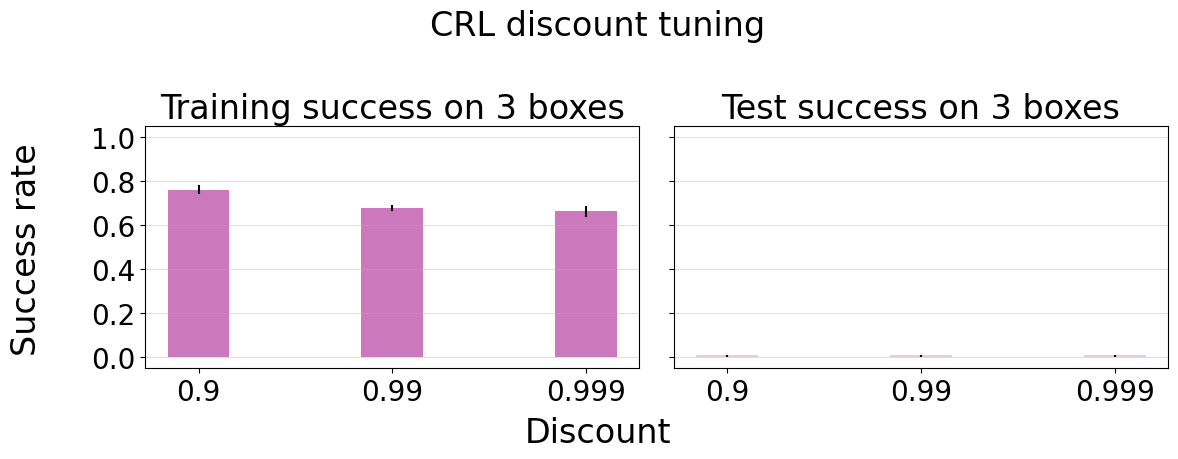

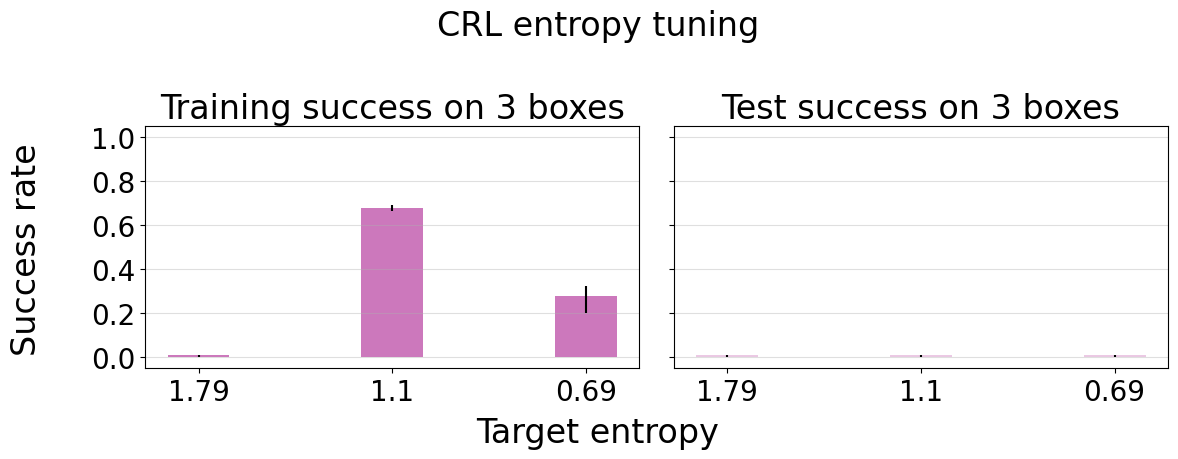

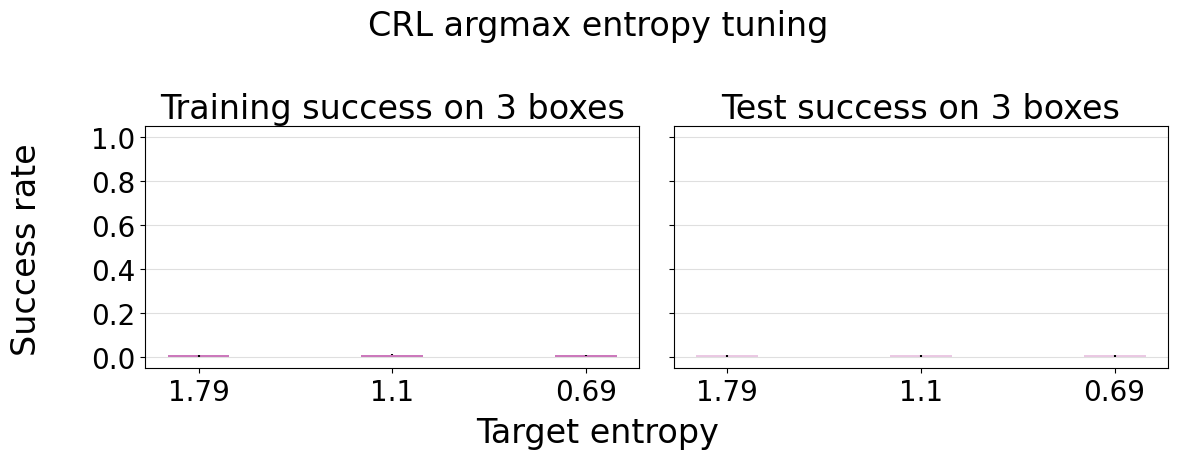

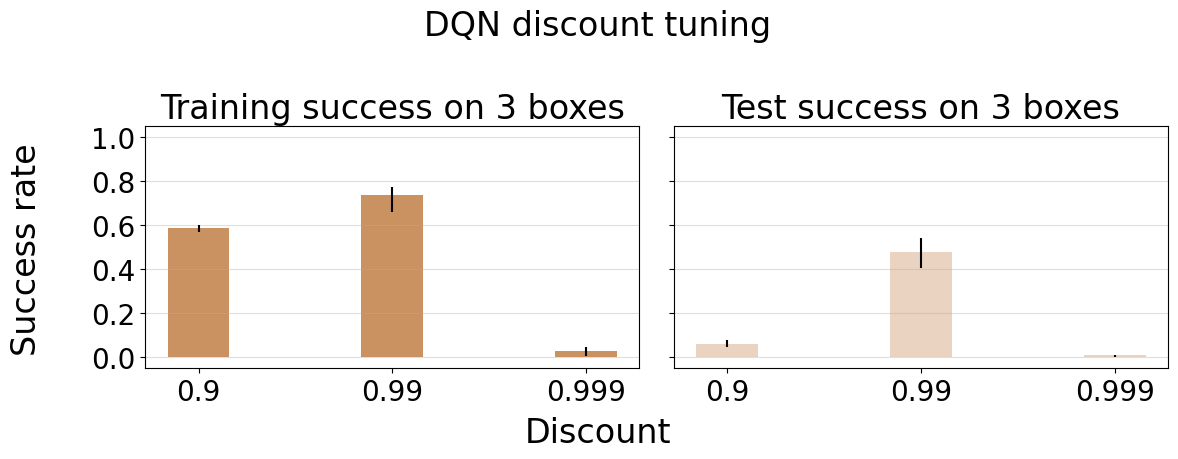

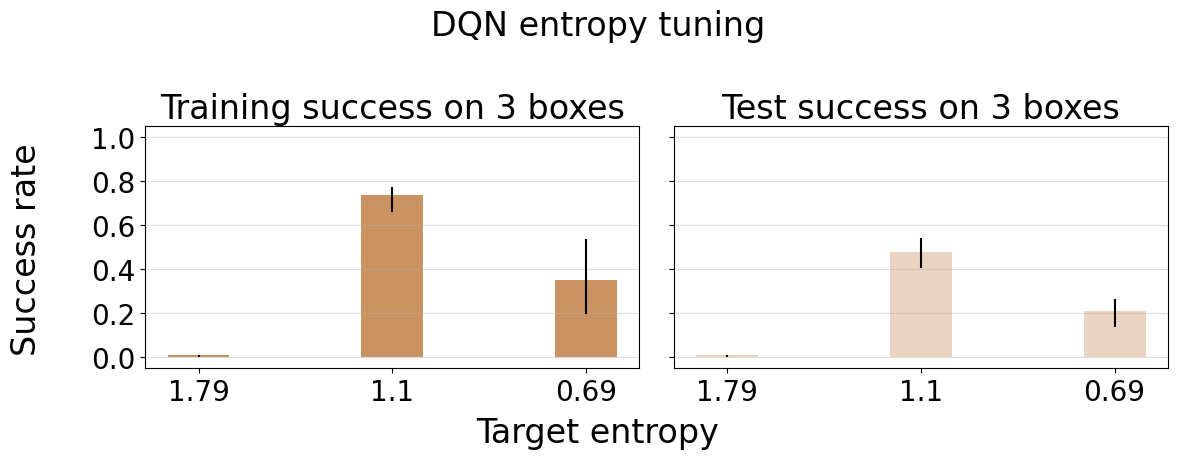

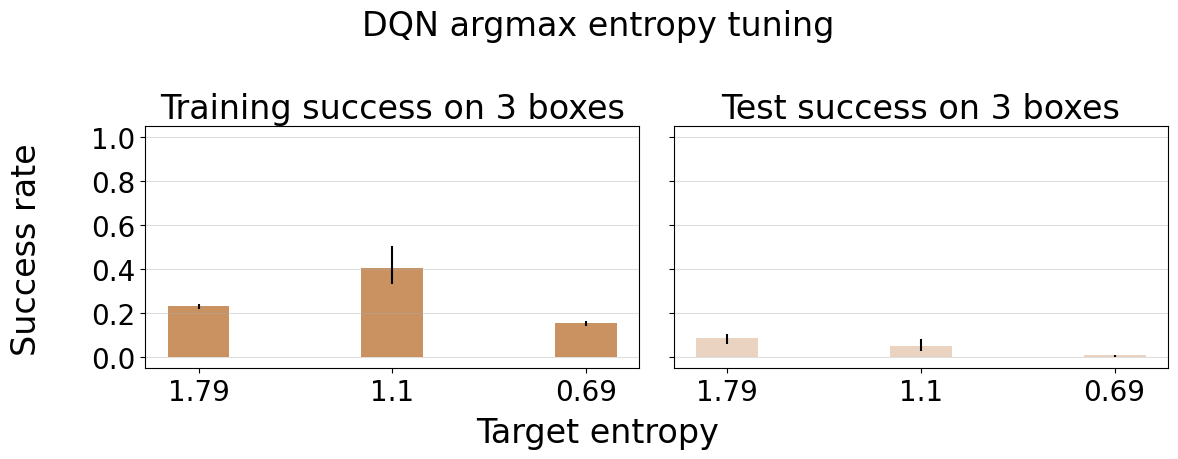

In [296]:

for config_idx, config in enumerate(all_configs):
    fig, ax = plt.subplots(1, 2, figsize=(12,5), sharey='row')
    fig.suptitle(config['title'])
    fig.supylabel('Success rate', x=0.01)
    fig.supxlabel(config['ylabel'], y=0.1)
    runs = []
    for project in config['projects']:
        project_runs = api.runs(path=f"{entity}/{project}", filters=config['filters'])
        runs.extend([r for r in project_runs])

    for r in runs:
        print(r.name)

    print()

    data = aggregate_data_from_wandb(runs, config['metrics'], config['possible_names'], config['grouping_func'], return_last_step=True)
    data_curves = aggregate_data_from_wandb(runs, config['metrics'], config['possible_names'], config['grouping_func'], return_last_step=False)


    empty_keys = []
    for k, v in data_curves.items():
        if v.size == 0:
            empty_keys.append(k)

    for k in empty_keys:
        del data_curves[k]

    new_data = OrderedDict()

    for k, v in data_curves.items():
        aggregated_v = np.mean(v[:, -5:, :], axis=1)
        new_data[k+'_test'] = aggregated_v[:, 1].reshape(-1, 1)
        new_data[k+'_train'] = aggregated_v[:, 0].reshape(-1, 1)

    names = list(new_data.keys())

    metrics_names = config['metrics']

    figure_path = os.path.join(figures_path, config['directory'])
    os.makedirs(figure_path, exist_ok=True)

    aggregate_func = lambda x: np.array([metrics.aggregate_iqm(x[:, i]) for i in range(x.shape[-1])])


    aggregate_scores, aggregate_scores_cis = rly.get_interval_estimates(
        new_data, aggregate_func, reps=500
    )


    ax[0].set_title(list(config['metrics'].values())[0])
    ax[0].grid(alpha=0.4, axis='y')
    ax[0].set_ylim(bottom=-0.05, top=1.05)
    ax[1].set_title(list(config['metrics'].values())[1])
    ax[1].grid(alpha=0.4, axis='y')
    ax[1].set_ylim(bottom=-0.05, top=1.05)
    box_centers = []

    box_labels = []
    for i, discount in enumerate(config['possible_names']):
        box_center = 2.5 * i + 0.5
        box_centers.append(box_center)
        # ax.axvspan(box_center - 1, box_center, color='palegreen', alpha=0.25)
        # ax[0].axvspan(box_center, box_center + 1, color='white', alpha=1.0, hatch='/')

        box_lookup_label = str(discount)
        box_labels.append(box_lookup_label)

        train_score = aggregate_scores[box_lookup_label + "_train"]
        test_score = aggregate_scores[box_lookup_label + "_test"]



        train_bottom = aggregate_scores_cis['_'.join([box_lookup_label, 'train'])][0]
        train_top = aggregate_scores_cis['_'.join([box_lookup_label, 'train'])][1]

        test_bottom = aggregate_scores_cis['_'.join([box_lookup_label, 'test'])][0]
        test_top = aggregate_scores_cis['_'.join([box_lookup_label, 'test'])][1]

        alg_id = "CRL" if "CRL" in config['projects'][0] else "DQN"


        train_color=return_color(alg_id, train=True)
        test_color=return_color(alg_id, train=False)
        train_score = np.clip(train_score, min=0.01)

        train_yerr_lower = np.clip(train_score - train_bottom, a_min=0, a_max=None)
        train_yerr_upper = np.clip(train_top - train_score, a_min=0, a_max=None)
        ax[0].bar(box_center, train_score, yerr=[train_yerr_lower, train_yerr_upper], color=train_color)

        test_score = np.clip(test_score, min=0.01)
        test_yerr_lower = np.clip(test_score - test_bottom, a_min=0, a_max=None)
        test_yerr_upper = np.clip(test_top - test_score, a_min=0, a_max=None)
        ax[1].bar(box_center, test_score, yerr=[test_yerr_lower, test_yerr_upper], color=test_color)

    ax[0].set_xticks(np.array(box_centers), box_labels)
    ax[0].set_yticks(np.arange(0, 1.1, 0.2))
    ax[1].set_xticks(np.array(box_centers), box_labels)
    ax[1].set_yticks(np.arange(0, 1.1, 0.2))


    legend_train_color = 'gray'
    legend_test_color = lighten_color('gray', amount=0.5)
    legend_elements = [Patch(facecolor=legend_train_color, label='Train'), Patch(facecolor=legend_test_color, label='Test')]

    # axes[1].legend(handles=legend_elements, edgecolor='black', loc='upper right')

    plt.tight_layout()

    plt.savefig(os.path.join(figure_path, config['save']) + '.png',bbox_inches='tight')
    plt.savefig(os.path.join(figure_path, config['save']) + '.pdf',bbox_inches='tight')
